<a href="https://colab.research.google.com/github/awannabecs/MY-FUNCTION-NAME/blob/main/PROJECT_1_TEXT_CLASSIFICATION_DEPRESSION_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the libraries 
import numpy as  np
import pandas as pd 
import tensorflow as tf
import nltk 
import re
import matplotlib.pyplot as plt 
nltk.download("punkt")
tokenizer = nltk.word_tokenize
tokenizer("go out")
stemmer = nltk.PorterStemmer().stem
stemmer("played")
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#import the dataset
df = pd.read_csv("/content/drive/MyDrive/MAIN_DATA")
df.dropna(inplace=False)

,Unnamed: 0,Unnamed: 0.1,depressed,text
0,0,0.0,0.0,I know where you're coming from mate.
1,1,1.0,0.0,I felt like this last year.
2,2,2.0,1.0,"I remember around this time last year, i was h..."
3,3,3.0,1.0,"i was heavily addicted to meth, it was literal..."
4,4,4.0,0.0,"I worked like 70+hours in a warehouse job, 2 h..."
...,...,...,...,...
1790,178,1210.0,1.0,hate shattered me
1791,179,1212.0,1.0,but I know depression and drug addiction don'...
1792,180,1233.0,1.0,I feel a lot of deeply depressed souls have d...
1793,181,1234.0,1.0,anxiety and mental breakdowns...|0|0|0|


In [3]:
#create the word2number dictionary
tokens = []
for i in range(len(df)):
  words = []
  try:
    words.extend(tokenizer(df.iloc[i]["text"].lower()))
    for word in words:
      word = word
      tokens.append(stemmer(word))
  except Exception as e:
    print(df.iloc[i]["text"])

tokens = set(tokens)

nan
nan
nan
nan
nan


In [4]:
somelist = [" '//twitter.com/ltsharrypotter/status/984475138933579782',", '//t.co/yacazn2t0h',
            "dk_mok", '70+hour', 'much|1|0|4|', 'collection|1|0|3|',"20",]
pattern = """\/?\/?twitter.com/.+|
\/?\/?t.co\/?.+|  
_|
\d+|
\|d\|\d\|\d|
"""
for word in somelist:
  word = re.sub(pattern,"",word)
  print(word)

 '
//t.co/yacazn2t0h
dk_mok
70+hour
much|1|0|4|
collection|1|0|3|
20


In [5]:
token2index_dict = {"OOV":0}
index2token_dict = {0:"OOV"}
for index,token in enumerate(tokens):
  token2index_dict[token] = index+1
  index2token_dict[index+1] = token

In [6]:
def token2index_function(dict,sent):
  result_sent = []
  for token in sent.split(" "):
    result_sent.append(dict.get(token,0))
  return result_sent


def index2token_function(dict,index):
  return dict.get(index,"OOV")

In [7]:
#make the sentences same-lengthed 
#find the max length
max_length = 0
for sent in range(len(df)):
  try:
    words = nltk.word_tokenize(df.iloc[sent]["text"])
  except Exception as e:
    print(df.iloc[sent]["text"])
  if len(words) > max_length:
    max_length = len(words)

nan
nan
nan
nan
nan


In [8]:
vector = [1,2,3,4,5,6,7,8]
def same_lengther(vector,max_length):
  zeros = np.zeros(max_length - len(vector))
  vector.extend(zeros)
  return vector

In [9]:
#define X and y
X = []
y = []
X_vector = []


for i in range(len(df)):
  feature = df["text"].iloc[i]
  label = int(df["depressed"].iloc[i])

  try:
    feature_vector = token2index_function(token2index_dict,feature)
    X_vector.append(same_lengther(feature_vector,max_length))
    y.append(label)
    X.append(feature.lower())
  except Exception as e:
    print(i)
    


534
727
979
1019
1242


In [10]:
X_vector = np.array(X_vector).astype("float32")
y = np.array(y).astype("float32")

X_vector.shape,y.shape
y = pd.get_dummies(y)

In [11]:
tf.random.set_seed(666)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(128,activation="relu"))
model1.add(tf.keras.layers.Dense(64,activation="relu"))
model1.add(tf.keras.layers.Dense(32,activation="relu"))
model1.add(tf.keras.layers.Dense(16,activation="relu"))
model1.add(tf.keras.layers.Dense(8,activation="relu"))
model1.add(tf.keras.layers.Dense(4,activation="relu"))
model1.add(tf.keras.layers.Dense(2,activation="sigmoid"))

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model1.fit(X_vector,y,epochs=100)

Epoch 1/100
81/81 [==============================] - 3s 9ms/step - loss: 7.0201 - accuracy: 0.4784
Epoch 2/100
81/81 [==============================] - 1s 7ms/step - loss: 0.7246 - accuracy: 0.4998
Epoch 3/100
81/81 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.5010
Epoch 4/100
81/81 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5018
Epoch 5/100
81/81 [==============================] - 1s 7ms/step - loss: 0.6924 - accuracy: 0.5025
Epoch 6/100
81/81 [==============================] - 1s 7ms/step - loss: 0.6924 - accuracy: 0.5025
Epoch 7/100
81/81 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5025
Epoch 8/100
81/81 [==============================] - 1s 7ms/step - loss: 0.6924 - accuracy: 0.5025
Epoch 9/100
81/81 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5025
Epoch 10/100
81/81 [==============================] - 1s 7ms/step - loss: 0.6923 - accuracy: 0.5025
Epoch 11/

In [12]:
y.iloc[1]

0.0    1
1.0    0
Name: 1, dtype: uint8



---

---



# ***since we are getting aweful results, we geuess that our vectors are too sparse, so first we try to plot a histogram to see how many instances of different sizes we have.***

---


---




In [13]:
#get a list of the length of the sentences 
len_sentences_list = []
for i in range(len(df)):
  try:
    words = nltk.word_tokenize(df["text"].iloc[i])
    len_sentences_list.append(len(words))
  except Exception as e:
    print(df["text"].iloc[i])

nan
nan
nan
nan
nan


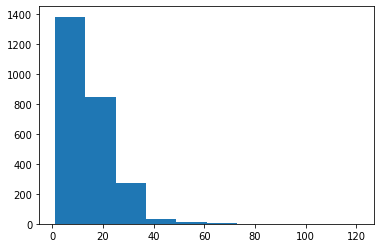

In [14]:
#plot the list as a histogram
plt.hist(len_sentences_list)
plt.show()



---



---


# ***as you can see, we only have under 100 sentences with the length of 40,let alone the 121...so it's better to change the padding by setting the maximum length to be around 40 so we would not have such sparse vectors***
---



---



In [15]:
model1_X = []
model1_y = []
len_sentences_list = []
for i in range(len(X)):
  words = nltk.word_tokenize(X[i])
  if len(words) <= 40:
    model1_X.append(X[i])
    len_sentences_list.append(len(words))
    model1_y.append(y.iloc[i])

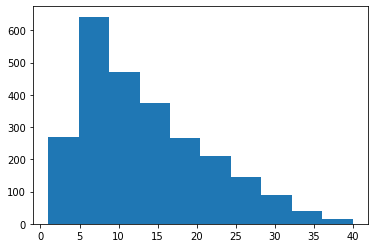

In [16]:
#let's replot the histogram to see what happened
plt.hist(len_sentences_list)
plt.show()


---


---

# ***That looks better***



---



---



In [17]:
model1_X_vectors = []
for sentence in model1_X:
  index_tokens = token2index_function(token2index_dict,sentence)
  model1_X_vectors.append(np.array(same_lengther(index_tokens,40)))  
model1_X_vectors = np.array(model1_X_vectors)
model1_y = np.array(model1_y).astype("float32")
# model1_y = pd.get_dummies(model1_y)

In [18]:
model1_X_vectors[0].shape,model1_y[0].shape

((40,), (2,))

In [19]:
tf.random.set_seed(666)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(128,activation="relu"))
model1.add(tf.keras.layers.Dense(64,activation="relu"))
model1.add(tf.keras.layers.Dense(32,activation="relu"))
model1.add(tf.keras.layers.Dense(16,activation="relu"))
model1.add(tf.keras.layers.Dense(8,activation="relu"))
model1.add(tf.keras.layers.Dense(4,activation="relu"))
model1.add(tf.keras.layers.Dense(2,activation="sigmoid"))

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model1.fit(model1_X_vectors,model1_y,epochs=100)

Epoch 1/100
79/79 [==============================] - 1s 3ms/step - loss: 9.4790 - accuracy: 0.4988
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.7280 - accuracy: 0.5004
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5040
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.5048
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5067
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5091
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5087
Epoch 8/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5083
Epoch 9/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5067
Epoch 10/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5087
Epoch 11/

# ***As you can see,we still get unsatisfactory results, so we try to change our representation of the words. We are going to use another mothod that works with word probabilities.***

In [20]:
#get the list of all words
negative_sentences_words = []
positive_sentences_words = []
all_words = []
for instance in range(len(df)):
  itsclass = df.iloc[instance]["depressed"]
  try:
    if itsclass == 0:
      negative_sentences_words.extend(tokenizer(df.iloc[instance]["text"].lower()))  
    elif itsclass == 1:
      positive_sentences_words.extend(tokenizer(df.iloc[instance]["text"].lower()))  
  except Exception as e:
    print("error")


all_words.extend(negative_sentences_words)
all_words.extend(positive_sentences_words) 
all_words = set(all_words)
 

error
error
error
error
error


In [21]:
positive_sentences_words_len = len(positive_sentences_words)
negative_sentences_words_len = len(negative_sentences_words)
positive_sentences_words_dict = Counter(positive_sentences_words)
negative_sentences_words_dict = Counter(negative_sentences_words)

In [22]:
positive_sentences_words_len_unique = len(set(positive_sentences_words))
negative_sentences_words_len_unique = len(set(negative_sentences_words))

In [23]:
#GETTING THE LAMBDA 
all_words_lambdas = {}
for word in all_words:
  positive_word_freq = (positive_sentences_words_dict[word] + 1) / (positive_sentences_words_len + positive_sentences_words_len_unique)
  negative_word_freq = (negative_sentences_words_dict[word] + 1) / (negative_sentences_words_len + negative_sentences_words_len_unique)
  all_words_lambdas[word] = np.log(positive_word_freq / negative_word_freq)


In [24]:
max_length = 42
model3_X = []
model3_y = []
sentence_representations = []
for index,sentence in enumerate(X):
  sentence_representation = []
  words = nltk.tokenize.word_tokenize(sentence)
  words_len = len(words)
  try:
    padding_number = max_length - words_len
    for word in words:
      sentence_representation.append(all_words_lambdas[word])
    sentence_representation.extend(np.zeros(padding_number))
    model3_X.append(sentence_representation)
    model3_y.append(df["depressed"].iloc[index])
  except Exception as e:
    print(f"length :{words_len}")

length :43
length :43
length :45
length :80
length :70
length :99
length :86
length :72
length :68
length :59
length :45
length :43
length :54
length :52
length :48
length :44
length :43
length :59
length :121
length :56
length :53
length :45
length :51
length :70
length :43
length :53
length :56
length :45
length :47
length :56
length :45
length :52
length :62
length :47


In [25]:
len(model3_X),len(model3_y)

(2531, 2531)

In [26]:
model3_y_ohe_narray = np.array(pd.get_dummies(model3_y))
model3_X_narray = np.array(model3_X)


In [27]:
model3_y_ohe_narray[1],model3_X_narray[1]
print(len(model3_X_narray),len(model3_y_ohe_narray))
print(model3_y_ohe_narray[1]),print(model3_X_narray[1])

2531 2531
[1 0]
[ 1.06851488  2.6727896   0.99758843  0.11868242 -0.24865986 -0.18762397
  0.43163883  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


(None, None)

In [28]:
tf.random.set_seed(666)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128,activation="relu"))
model1.add(tf.keras.layers.Dense(64,activation="relu"))
model1.add(tf.keras.layers.Dense(32,activation="relu"))
model1.add(tf.keras.layers.Dense(16,activation="relu"))
model1.add(tf.keras.layers.Dense(8,activation="relu"))
model1.add(tf.keras.layers.Dense(4,activation="relu"))
model1.add(tf.keras.layers.Dense(2,activation="sigmoid"))

model1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model1.fit(model3_X_narray,model3_y_ohe_narray,epochs=100)

Epoch 1/100
80/80 [==============================] - 1s 3ms/step - loss: 0.1473 - accuracy: 0.7519
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.8119
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 0.0975 - accuracy: 0.8198
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 0.0951 - accuracy: 0.8234
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.8317
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 0.0906 - accuracy: 0.8455
Epoch 7/100
80/80 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.8514
Epoch 8/100
80/80 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.8582
Epoch 9/100
80/80 [==============================] - 0s 3ms/step - loss: 0.0840 - accuracy: 0.8605
Epoch 10/100
80/80 [==============================] - 0s 3ms/step - loss: 0.0824 - accuracy: 0.8649
Epoch 11/

# The results are promising...but maybe TOO PROMISING....let's get out of our practice zone and get real by dividing the dataset into train,validation and test set to see if we are overfitting

In [29]:
model4_X = model3_X_narray
model4_y = model3_y_ohe_narray
trainset_index = int((len(model4_X) / 100) * 80)
validationset_index = int((len(model4_X) - trainset_index ) / 2)
trainset_X,trainset_y = model4_X[:trainset_index],model4_y[:trainset_index]
validationset_X,validationset_y = model4_X[trainset_index:trainset_index+validationset_index],model4_y[trainset_index:trainset_index+validationset_index]
testset_X,testset_y = model4_X[trainset_index+validationset_index:],model4_y[trainset_index+validationset_index:]

In [30]:
print(len(trainset_X),len(trainset_y))
print(len(validationset_X),len(validationset_y))
print(len(testset_X),len(testset_y))

2024 2024
253 253
254 254


In [31]:
tf.random.set_seed(666)
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(128,activation="relu"))
model4.add(tf.keras.layers.Dense(64,activation="relu"))
model4.add(tf.keras.layers.Dense(32,activation="relu"))
model4.add(tf.keras.layers.Dense(16,activation="relu"))
model4.add(tf.keras.layers.Dense(8,activation="relu"))
model4.add(tf.keras.layers.Dense(4,activation="relu"))
model4.add(tf.keras.layers.Dense(2,activation="sigmoid"))

model4.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
model4.fit(trainset_X,trainset_y,validation_data=[validationset_X,validationset_y],epochs=100)

Epoch 1/100
64/64 [==============================] - 1s 7ms/step - loss: 0.1570 - accuracy: 0.7273 - val_loss: 0.1316 - val_accuracy: 0.9842
Epoch 2/100
64/64 [==============================] - 0s 4ms/step - loss: 0.1277 - accuracy: 0.7673 - val_loss: 0.0130 - val_accuracy: 1.0000
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 0.1209 - accuracy: 0.7757 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.1181 - accuracy: 0.7836 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 5/100
64/64 [==============================] - 0s 4ms/step - loss: 0.1147 - accuracy: 0.7905 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 0.1114 - accuracy: 0.7974 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 7/100
64/64 [==============================] - 0s 4ms/step - loss: 0.1091 - accuracy: 0.8073 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 8/100
6

In [43]:
predicted_testset_y = model4.predict(testset_X)
print(sum(predicted_testset_y == testset_y)[0]/ len(testset_y))

0.5


# ***Wait...what happened???High train accuracy set and high validation set but low test set***

# **1)shuffling dataset**
# **2)using cross validation**
# **3)see whether the classes are balanced**